In [29]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("drive/MyDrive/Data Science/K-Mean Clustering/income.csv")
df

Text(0, 0.5, 'Income($)')

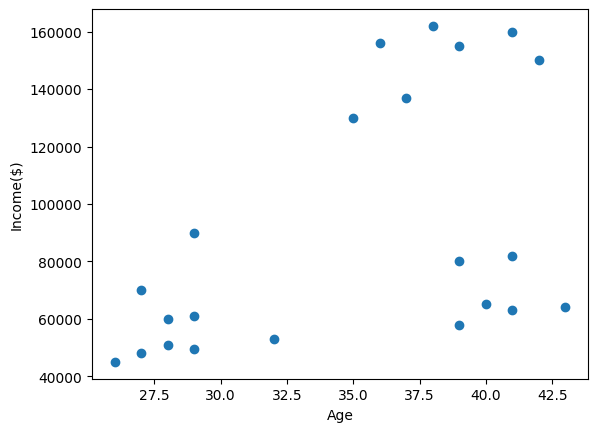

In [113]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

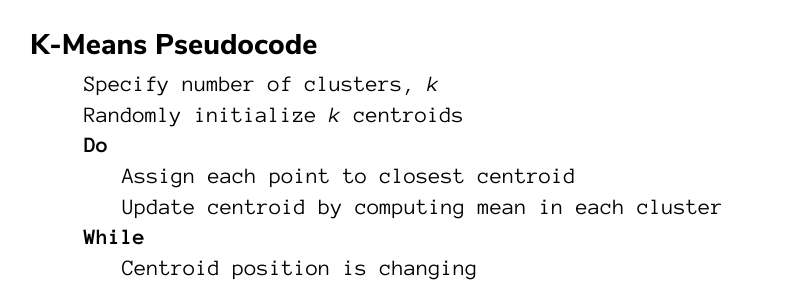

1. Start with k centroids by putting them at random points here k =2
2. Compute distance of every point from centroid and cluster them accordingly to the nearest centroid
3. Adjust centroid so they become center of gravity of given cluster [Mean on each cluster is the new centroid]
4. Again recluster every point based on distance with adjusted centroid
5. Reiterate until data points stop changing cluster
6. Again adjust centroids

In [114]:
X_train = df[['Age','Income($)']].to_numpy()

In [116]:
def recalculate_clusters(X, centroids, k):
    # Defining empty clusters
    clusters = {}
    clusters_list = []
    for i in range(k):
        clusters[i] = []
    # Compute distance of every point from centroid and cluster them accordingly to the nearest centroid
    for data in X:
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j])) #[86000.00047093023, 0.0, 20000.0001]
        clusters[euc_dist.index(min(euc_dist))].append(data) # Selecting index of min distance & assiging to that cluster
        clusters_list.append(euc_dist.index(min(euc_dist)))
    return clusters, clusters_list    
 
def recalculate_centroids(centroids, clusters, k):
    # Recalculating centroid based on the mean of cluster
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis=0)
    return centroids

def k_means_clustering(X, centroids={}, k=3, repeats=1):
    # Selecting random centroids 
    for i in range(k):
        random_img_centroid = random.randint(0, 9)
        centroids[i] =  X[random_img_centroid]
    # Repeating steps N times or stop when clusters remain same
    for i in range(repeats):        
        clusters, clusters_list = recalculate_clusters(X, centroids, k,)  
        centroids = recalculate_centroids(centroids, clusters, k)

    return clusters,centroids, clusters_list

In [117]:
clusters,centroids, clusters_list=k_means_clustering(X_train)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [118]:
clusters_list = np.array(clusters_list)

In [ ]:
df['pred_cluster']=clusters_list

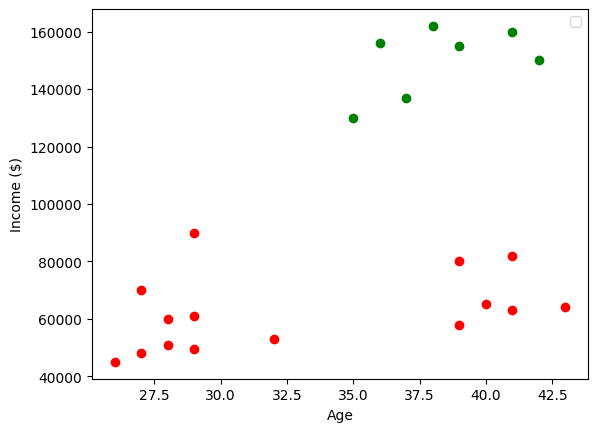

In [122]:
df1 = df[df.pred_cluster==0]
df2 = df[df.pred_cluster==1]
df3 = df[df.pred_cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()